In [ ]:
import pandas as pd
df = pd.read_csv('Zookeeper.log', sep="INFO",header=None,error_bad_lines=False)
print(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


                                0                                                  1
0      2015-07-29 17:41:41,536 -     [main:QuorumPeerConfig@101] - Reading config...
1      2015-07-29 17:41:41,544 -     [main:QuorumPeerConfig@334] - Defaulting to ...
2      2015-07-29 17:41:41,555 -     [main:DatadirCleanupManager@78] - autopurge....
3      2015-07-29 17:41:41,555 -     [main:DatadirCleanupManager@79] - autopurge....
4      2015-07-29 17:41:41,557 -     [main:DatadirCleanupManager@101] - Purge tas...
...                           ...                                                ...
74375  2015-08-25 11:26:27,898 -     [WorkerReceiver[myid=3]:FastLeaderElection@5...
74376  2015-08-25 11:26:28,138 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74379  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.0.2


In [ ]:
df

,0,1
0,"2015-07-29 17:41:41,536 -",[main:QuorumPeerConfig@101] - Reading config...
1,"2015-07-29 17:41:41,544 -",[main:QuorumPeerConfig@334] - Defaulting to ...
2,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@78] - autopurge....
3,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@79] - autopurge....
4,"2015-07-29 17:41:41,557 -",[main:DatadirCleanupManager@101] - Purge tas...
...,...,...
74375,"2015-08-25 11:26:27,898 -",[WorkerReceiver[myid=3]:FastLeaderElection@5...
74376,"2015-08-25 11:26:28,138 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...


In [ ]:
df.columns=['Date&Time','Message']

In [ ]:
df

,Date&Time,Message
0,"2015-07-29 17:41:41,536 -",[main:QuorumPeerConfig@101] - Reading config...
1,"2015-07-29 17:41:41,544 -",[main:QuorumPeerConfig@334] - Defaulting to ...
2,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@78] - autopurge....
3,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@79] - autopurge....
4,"2015-07-29 17:41:41,557 -",[main:DatadirCleanupManager@101] - Purge tas...
...,...,...
74375,"2015-08-25 11:26:27,898 -",[WorkerReceiver[myid=3]:FastLeaderElection@5...
74376,"2015-08-25 11:26:28,138 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...


In [ ]:
df=df.head(25000)

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation

    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    stemmed=[ps.stem(token) for token in tokens]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    return text_cleaned

In [ ]:
df['Message']=df['Message'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned_comments']=df['Message'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from collections import Counter
dt=df['Message']
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

                                                 Word  Frequency
0                                                None      16806
1                                                   -       8228
2                                          connection       4770
3                                             request       3530
4   [/10.10.34.11:3888:QuorumCnxManager$Listener@493]       3524
5                                            Received       3524
6                                             session       1897
7                                                 for       1552
8                                              socket       1246
9                                              client       1238
10                                            timeout        944
11  [QuorumPeer[myid=1]/0:0:0:0:0:0:0:0:2181:FastL...        772
12                                       Notification        772
13                                               time        772
14                       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wordcloud

In [ ]:
X=df[['cleaned_comments']]

In [ ]:
X

,cleaned_comments
0,mainquorumpeerconfig101 read configur etczook...
1,mainquorumpeerconfig334 default major quorum
2,maindatadircleanupmanager78 autopurgesnapreta...
3,maindatadircleanupmanager79 autopurgepurgeint...
4,maindatadircleanupmanager101 purg task schedul
...,...
24995,none
24996,none
24997,quorumpeermyid1000000002181fastleaderelection...
24998,none


In [ ]:
X=X[X['cleaned_comments'] != 'none']

In [ ]:
X

,cleaned_comments
0,mainquorumpeerconfig101 read configur etczook...
1,mainquorumpeerconfig334 default major quorum
2,maindatadircleanupmanager78 autopurgesnapreta...
3,maindatadircleanupmanager79 autopurgepurgeint...
4,maindatadircleanupmanager101 purg task schedul
...,...
24985,quorumpeermyid1000000002181fastleaderelection...
24988,quorumpeermyid1000000002181fastleaderelection...
24991,quorumpeermyid1000000002181fastleaderelection...
24994,quorumpeermyid1000000002181fastleaderelection...


In [ ]:
X_data=X.iloc[:,:].values

In [ ]:
X_data

array([[' mainquorumpeerconfig101 read configur etczookeeperconfzoocfg'],
       [' mainquorumpeerconfig334 default major quorum'],
       [' maindatadircleanupmanager78 autopurgesnapretaincount set 3'],
       ...,
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000'],
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000'],
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000']],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100,ngram_range=(1,1))
X_data_vectored = vectorizer.fit_transform(X_data.ravel())

In [ ]:
X_data_vectored

<8194x100 sparse matrix of type '<class 'numpy.float64'>'
	with 38840 stored elements in Compressed Sparse Row format>

In [ ]:
!pip install sparse

In [ ]:
X_data_array=X_data_vectored.toarray()

In [ ]:
X_data_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_data_array.shape

(8194, 100)

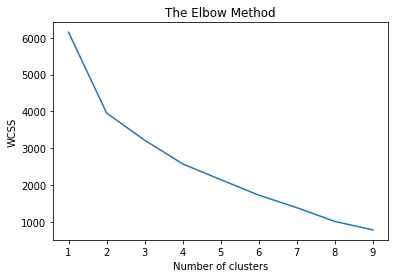

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K Measn Clustering**

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data_array)

**Labels**

In [ ]:
print(y_kmeans)

[0 0 0 ... 0 0 0]


**Gaussian Mixture Models**

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=5, random_state=0).fit(X_data_array)

In [ ]:
y_gmm=gm.predict(X_data_array)

In [ ]:
y_gmm

array([3, 3, 3, ..., 1, 1, 1])

**RCC**

In [ ]:
import pyrcc
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score
clusterer = pyrcc.RccCluster(k=2,measure='euclidean')

P = clusterer.update_rcc_fit(X_data_array)

mu = 3.003000532453541, lambda = 996.1071124561994, epsilon = 0.2850489914417267, delta = 0.2850489914417267
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 87.5291060025376 | 87.5291060025376
 2 | 3.554526466716865 | 0.5409066267879743 | 4.095433093504839
 3 | 3.706921947826461 | 0.35055850162765056 | 4.057480449454111
 4 | 3.707714512076688 | 0.3496581121394498 | 4.057372624216137
 5 | 3.7070447292924076 | 0.349892952914571 | 4.0569376822069785
 6 | 3.705316933044345 | 0.35073798732056605 | 4.056054920364911
 7 | 3.7018100763894086 | 0.3524260988787108 | 4.0542361752681195


**BIRCH Clustering**

In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=5)
brc.fit(X_data_array)
y_pred=brc.predict(X_data_array)

In [ ]:
y_pred

array([3, 0, 2, ..., 0, 0, 0])

**RCC with DR ( PCA)**

In [ ]:
X_data_array 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_data_array.shape

(8194, 100)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_data_array_DR=pca.fit_transform(X_data_array)

In [ ]:
X_data_array_DR.shape

(8194, 10)

In [ ]:
import pyrcc
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score
clusterer = pyrcc.RccCluster(measure='cosine')

P = clusterer.update_rcc_fit(X_data_array_DR)

mu = 0.6489074307951164, lambda = 3.630040697073663, epsilon = 0.34185686707496643, delta = 0.34185686707496643
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.26600857323498583 | 0.26600857323498583
 2 | 0.03353389840448314 | 0.06871228285656203 | 0.10224618126104518
 3 | 0.0370528650163749 | 0.0647137853275866 | 0.10176665034396151
 4 | 0.03719553195765111 | 0.058198812674716494 | 0.0953943446323676


In [ ]:
P

array([   0,    1,    2, ..., 6416, 6417, 6418], dtype=int32)

**Streamming Data Clustering with Robust Continuous Clustering with DR**

In [ ]:
streamming_dataset=pd.read_csv('/content/streamming_log.csv')

In [ ]:
streamming_dataset['cleaned_comments'][0:10]

0     mainquorumpeerconfig101 read configur etczook...
1         mainquorumpeerconfig334 default major quorum
2     maindatadircleanupmanager78 autopurgesnapreta...
3     maindatadircleanupmanager79 autopurgepurgeint...
4       maindatadircleanupmanager101 purg task schedul
5              mainquorumpeermain127 start quorum peer
6     mainnioservercnxnfactory94 bind port 00000000...
7                   mainquorumpeer913 ticktim set 2000
8            mainquorumpeer933 minsessiontimeout set 1
9            mainquorumpeer944 maxsessiontimeout set 1
Name: cleaned_comments, dtype: object

In [ ]:
streamming_dataset=streamming_dataset.drop_duplicates()

In [ ]:
streamming_dataset

,Unnamed: 0,cleaned_comments
0,0,mainquorumpeerconfig101 read configur etczook...
1,1,mainquorumpeerconfig334 default major quorum
2,2,maindatadircleanupmanager78 autopurgesnapreta...
3,3,maindatadircleanupmanager79 autopurgepurgeint...
4,4,maindatadircleanupmanager101 purg task schedul
...,...,...
8189,24985,quorumpeermyid1000000002181fastleaderelection...
8190,24988,quorumpeermyid1000000002181fastleaderelection...
8191,24991,quorumpeermyid1000000002181fastleaderelection...
8192,24994,quorumpeermyid1000000002181fastleaderelection...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=50,ngram_range=(2,3))
import pyrcc
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.manifold import TSNE


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.decomposition import PCA

import queue
from queue import *
import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
def streamming_rcc(streamming_log_batch,vectorizer):
  #print(current_batch_log)
  log_vectorized= vectorizer.fit_transform(current_batch_log.ravel())
  vectorized_log_array=log_vectorized.toarray()
  X_embedded = PCA(n_components=2).fit_transform(vectorized_log_array)
  clusterer = pyrcc.RccCluster(k=5,measure='euclidean')
  current_stream_label = clusterer.update_rcc_fit(X_embedded)
  print(current_stream_label)
  current_stream_label_c=np.array(current_stream_label)
  if(len(np.unique(current_stream_label_c))>2):
    score=silhouette_score(X_embedded,current_stream_label_c)
  else:
    score=1
  return score


In [ ]:
import time
start = time.time()
silhouette_value =[]

i,j=0,50
for k in range(streamming_dataset.shape[0]):
  if i<streamming_dataset.shape[0]:
     current_batch_log=streamming_dataset['cleaned_comments'][i:j]
     value=streamming_rcc(current_batch_log,vectorizer)
     silhouette_value.append(value)
     j=j+50
     i=i+50

end=time.time()
total_time_rcc=end-start
print('Total time is',total_time_rcc)

mu = 0.041382068089835355, lambda = 0.8072390539984767, epsilon = 0.11744795739650726, delta = 0.11744795739650726
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.004421318191357863 | 0.004421318191357863
[ 0  0  0  0  1  0  2  0  0  0  0  2  2  2  0  3  4  5  6  6  6  6  6  7
  2  2  2  8  9 10 11 11 11 11 11 12 13 14 15 16 17 18 19 20 21  0  0  2
  2  2]
mu = 0.1408899257797358, lambda = 0.7580672417927481, epsilon = 0.2167101949453354, delta = 0.2167101949453354
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.015279462767196859 | 0.015279462767196859
[ 0  0  0  0  0  0  0  0  0  0  0  1  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  2  2  4  3  3  5  6  7  8  9  3  3 10 11 12  3 13 14 15
  2  2]
mu = 0.9057945094188398, lambda = 0.16482240693973366, epsilon = 0.015058740973472595, delta = 0.015058740973472595
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.020830479781276452 | 0.020830479781276452
 2 | 0.001147200680168007 | 0.015656526218606016 | 0.016803726898774022
 3 | 0.0008

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [ ]:
silhouette_value=np.array(silhouette_value) 

In [ ]:
rcc_SV=silhouette_value.mean()

In [ ]:
rcc_SV

0.3634488528165546

In [ ]:
total_time_rcc

12.690874576568604

Density Based Cluster Algorithm Implementation DBSCAN

In [ ]:
def streamming_dbscan(streamming_log_batch,vectorizer):
  #print(current_batch_log)
  log_vectorized= vectorizer.fit_transform(current_batch_log.ravel())
  vectorized_log_array=log_vectorized.toarray()
  X_embedded = PCA(n_components=2).fit_transform(vectorized_log_array)
  dbscan=DBSCAN.DBSCAN(0.05,1)
  point_labels, clusters = dbscan.fit(X_embedded, 0.005, 1)
  print(point_labels)
  print(clusters)
  point_labels_c=np.array(point_labels)
  if(len(np.unique(point_labels_c))>2):
    score=silhouette_score(X_embedded,point_labels_c)
  else:
    score=1
  return score

In [ ]:
i,j=0,50
import time
start = time.time()
silhouette_value =[]

for k in range(streamming_dataset.shape[0]):
  if i<streamming_dataset.shape[0]:
     current_batch_log=streamming_dataset['cleaned_comments'][i:j]
     score_value=streamming_dbscan(current_batch_log,vectorizer)
     silhouette_value.append(score_value)
     j=j+50
     i=i+50

end = time.time()
total_time_dbscan=end-start
print('Total time',total_time_dbscan)

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 2, 2, 2]
6
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2]
5
[1, 2, 3, 4, 1, 5, 6, 7, 2, 8, 9, 10, 11, 12, 12, 6, 13, 14, 15, 16, 17, 18, 17, 19, 12, 20, 21, 8, 22, 23, 12, 24, 17, 25, 7, 15, 22, 1, 2, 12, 26, 12, 27, 4, 8, 6, 11, 17, 17, 8]
28
[1, 2, 3, 4, 1, 5, 6, 7, 3, 1, 8, 5, 3, 4, 9, 10, 1, 11, 12, 13, 12, 14, 15, 16, 17, 2, 18, 19, 8, 19, 12, 20, 21, 1, 1, 22, 13, 11, 14, 23, 24, 5, 25, 3, 18, 12, 12, 8, 19, 13]
26
[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 4, 5, 10, 11, 12, 4, 13, 14, 15, 16, 1, 17, 18, 19, 13, 18, 4, 20, 15, 10, 15, 21, 1, 4, 22, 11, 23, 24, 25, 4, 26, 27, 27, 28, 29, 5, 1, 14, 15, 15]
30
[1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 10, 11, 12, 13, 14, 4, 14, 13, 15, 7, 7, 4, 4, 16, 17, 10, 14, 4, 18, 4, 15, 15, 7, 19, 5, 1, 20, 21, 22, 23, 24, 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [ ]:
total_time_dbscan

12.986172199249268

In [ ]:
silhouette_value=np.array(silhouette_value)

In [ ]:
dbscan_value_SV=silhouette_value.mean() 

In [ ]:
dbscan_value_SV

0.7595482871034311

Results Visualization

In [ ]:
plot_results=[['DBSCAN',dbscan_value_SV,total_time_dbscan],
              ['RCC-DR',rcc_SV,total_time_rcc]]

In [ ]:
plot_results_df=pd.DataFrame(plot_results,columns=['Algorithm','silhouette_score','time'])

In [ ]:
plot_results_df

,Algorithm,silhouette_score,time
0,DBSCAN,0.759548,12.986172
1,RCC-DR,0.363449,12.690875


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Zookeeper Logs)')

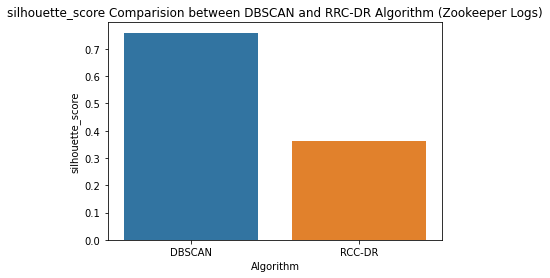

In [ ]:
sns.barplot(x='Algorithm',y='silhouette_score',data=plot_results_df)
plt.title('silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Zookeeper Logs)')

Text(0, 0.5, 'time (sec)')

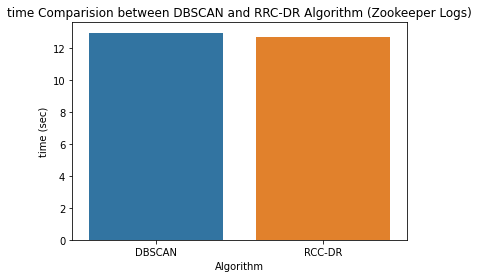

In [ ]:
sns.barplot(x='Algorithm',y='time',data=plot_results_df)
plt.title('time Comparision between DBSCAN and RRC-DR Algorithm (Zookeeper Logs)')
plt.ylabel('time (sec)')

Dataset 1 @ Amazon Reviews Clustering , Dataset Domain @ E Commerce

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d eswarchandt/amazon-music-reviews

amazon-music-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/amazon-music-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
dataset_reviews=pd.read_csv('/content/Musical_instruments_reviews.csv')

In [ ]:
dataset_reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [ ]:
dataset_reviews=dataset_reviews[['reviewText']]

In [ ]:
dataset_reviews

,reviewText
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...
...,...
10256,"Great, just as expected. Thank to all."
10257,I've been thinking about trying the Nanoweb st...
10258,I have tried coated strings in the past ( incl...
10259,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [ ]:
dataset_reviews['reviewText']=dataset_reviews['reviewText'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_reviews['cleaned_review']=dataset_reviews['reviewText'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_reviews

,reviewText,cleaned_review
0,"Not much to write about here, but it does exac...",much write exactli suppos filter pop sound rec...
1,The product does exactly as it should and is q...,product exactli quit affordablei realiz doubl ...
2,The primary job of this device is to block the...,primari job devic block breath would otherwis ...
3,Nice windscreen protects my MXL mic and preven...,nice windscreen protect mxl mic prevent pop th...
4,This pop filter is great. It looks and perform...,pop filter great look perform like studio filt...
...,...,...
10256,"Great, just as expected. Thank to all.",great expect thank
10257,I've been thinking about trying the Nanoweb st...,ive think tri nanoweb string bit put high pric...
10258,I have tried coated strings in the past ( incl...,tri coat string past includ elixir never fond ...
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",well made elixir develop taylor guitar string ...


In [ ]:
import time
start = time.time()
silhouette_value =[]

i,j=0,50
for k in range(dataset_reviews.shape[0]):
  if i<dataset_reviews.shape[0]:
     current_batch_log=dataset_reviews['cleaned_review'][i:j]
     value=streamming_rcc(current_batch_log,vectorizer)
     silhouette_value.append(value)
     j=j+50
     i=i+50

end=time.time()
total_time_rcc=end-start
print('Total time is',total_time_rcc)

mu = 0.5961011815435739, lambda = 0.2534096600643737, epsilon = 0.014452516101300716, delta = 0.014452516101300716
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.09039063525319023 | 0.09039063525319023
 2 | 0.008332343246883296 | 0.06514905323045897 | 0.07348139647734227
 3 | 0.007933462155819521 | 0.05788128741120935 | 0.06581474956702887
 4 | 0.006309710870323691 | 0.04913038680549676 | 0.05544009767582045
 5 | 0.004729315278803154 | 0.03936152841194512 | 0.04409084369074827
 6 | 0.003043674913089196 | 0.02935107507037531 | 0.032394749983464505
 7 | 0.001908939644785341 | 0.02003308049731915 | 0.02194202014210449
[ 0  1  2  3  0  4  5  6  7  8  9  3 10 11 12 10 13 14 10 15 16 17 18 19
 10 20 21 22  3  3 10 23  3 14 13 14  3  3 14 14  3 24  3 14 17  9  3 10
  3 25]
mu = 1.0989080155094477, lambda = 0.2680570669595428, epsilon = 0.0151542779058218, delta = 0.0151542779058218
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.11246288938017357 | 0.11246288938017357
 2 | 0.00911674986407125 

In [ ]:
silhouette_value=np.array(silhouette_value) 

In [ ]:
rcc_SV=silhouette_value.mean()

In [ ]:
rcc_SV

0.3400349664447983

In [ ]:
total_time_rcc

25.328673839569092

In [ ]:
i,j=0,100
import time
start = time.time()
silhouette_value =[]

for k in range(dataset_reviews.shape[0]):
  if i<dataset_reviews.shape[0]:
     current_batch_log=dataset_reviews['cleaned_review'][i:j]
     score_value=streamming_dbscan(current_batch_log,vectorizer)
     silhouette_value.append(score_value)
     j=j+100
     i=i+100

end = time.time()
total_time_dbscan=end-start
print('Total time',total_time_dbscan)

[1, 2, 3, 3, 1, 4, 5, 6, 7, 8, 9, 3, 10, 11, 3, 10, 12, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 3, 24, 25, 26, 27, 28, 3, 3, 29, 30, 31, 32, 33, 3, 34, 35, 36, 3, 3, 3, 37, 38, 14, 39, 40, 41, 42, 43, 3, 44, 45, 19, 46, 47, 3, 48, 3, 49, 50, 14, 51, 52, 53, 54, 55, 40, 56, 3, 57, 23, 3, 11, 3, 58, 3, 59, 19, 3, 60, 61, 3, 62, 63, 23, 34, 3, 64, 48, 65, 3, 66]
67
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 11, 11, 11, 16, 11, 11, 11, 17, 18, 11, 19, 20, 10, 21, 11, 22, 23, 15, 15, 24, 11, 25, 11, 11, 15, 11, 11, 11, 26, 15, 11, 27, 28, 29, 30, 15, 11, 6, 15, 11, 31, 11, 32, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 33, 10, 11, 34, 35, 23, 36, 15, 23, 37, 2, 11, 11, 15, 11, 10, 38, 39, 23, 23, 27, 40, 12, 11, 41, 30, 42, 23, 26, 43, 44, 45]
46
[1, 2, 3, 4, 5, 2, 2, 6, 7, 2, 6, 7, 2, 4, 2, 4, 8, 6, 2, 3, 3, 2, 4, 4, 4, 4, 2, 5, 4, 2, 4, 2, 6, 3, 4, 2, 2, 4, 5, 4, 9, 9, 4, 9, 4, 4, 4, 9, 9, 4, 10, 6, 6, 2, 2, 6, 7, 2, 2, 6, 4, 2, 2, 3, 4, 4, 11, 2, 6, 4, 4, 4, 6, 6, 4, 5, 2, 7

In [ ]:
total_time_dbscan

24.245221614837646

In [ ]:
silhouette_value=np.array(silhouette_value)

In [ ]:
dbscan_value_SV=silhouette_value.mean() 

In [ ]:
dbscan_value_SV

0.4855574127821754

  Algorithm  silhouette_score       time
0    DBSCAN          0.485557  24.245222
1    RCC-DR          0.340035  25.328674


Text(0.5, 1.0, 'silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Amazon Reviews)')

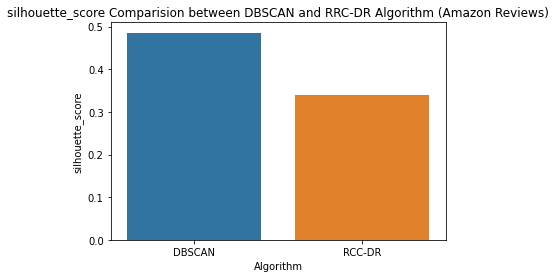

In [ ]:
plot_results=[['DBSCAN',dbscan_value_SV,total_time_dbscan],
              ['RCC-DR',rcc_SV,total_time_rcc]]

plot_results_df=pd.DataFrame(plot_results,columns=['Algorithm','silhouette_score','time'])
print(plot_results_df)

sns.barplot(x='Algorithm',y='silhouette_score',data=plot_results_df)
plt.title('silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Amazon Reviews)')


Text(0, 0.5, 'time (sec)')

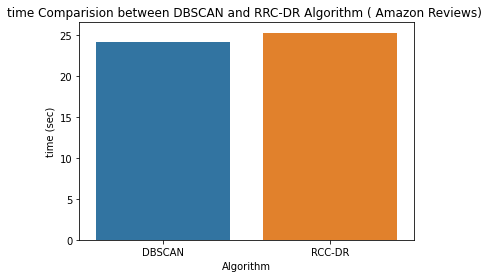

In [ ]:
sns.barplot(x='Algorithm',y='time',data=plot_results_df)
plt.title('time Comparision between DBSCAN and RRC-DR Algorithm ( Amazon Reviews) ')
plt.ylabel('time (sec)')

Dataset 2 @ Covid 19 Data Analysis , Dataset Domain @ Healthcare

In [ ]:
!kaggle datasets download -d jannalipenkova/covid19-public-media-dataset

covid19-public-media-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/covid19-public-media-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
dataset_covid=pd.read_csv('/content/covid19_articles_20201231.csv',nrows=150000)

In [ ]:
dataset_covid

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business
1,Thomas Hughes,2020-01-03,marketbeat,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,The labor markets were one of the most closely...,business
2,Steve Anderson,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,"It could be forgiven, that some might think th...",business
3,Roberto Torres,2020-01-03,ciodive,"On the road to AI adoption, execs grapple with...",https://www.ciodive.com/news/ai-adoption-execs...,CIOs kicked off 2019 with AI as an item to wat...,tech
4,Alden Wicker,2020-01-06,instyle,Red Carpet Sustainability After Coronavirus Sh...,https://www.instyle.com/fashion/red-carpet-cor...,When the coronavirus pandemic is over and life...,consumer
...,...,...,...,...,...,...,...
149995,NaN,2020-06-11,finance.yahoo,Euro Rally Shows Signs of Fatigue on Risk of S...,https://finance.yahoo.com/news/euro-rally-show...,(Bloomberg) -- The euro has proved a key winne...,business
149996,NaN,2020-06-11,finance.yahoo,"S&P/TSX composite plunges, while U.S. stocks a...",https://ca.finance.yahoo.com/news/north-americ...,TORONTO — Canada's main stock index plummeted ...,business
149997,NaN,2020-06-11,finance.yahoo,"Dow Jones Plunges 1,000 Points On Second Wave ...",http://finance.yahoo.com/m/a348d757-27fa-3ece-...,The major stock indexes were sharply lower ear...,business
149998,NaN,2020-06-11,finance.yahoo,Allowing zombie companies to linger might be w...,https://finance.yahoo.com/video/allowing-zombi...,BNY Mellon Asset Management Chief Economist Vi...,business


In [ ]:
dataset_covid=dataset_covid[['title']]

In [ ]:
dataset_covid

,title
0,Three Industrial Giants You Should Own In 2020
1,Labor Stocks Are Going To Break Out In 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est..."
3,"On the road to AI adoption, execs grapple with..."
4,Red Carpet Sustainability After Coronavirus Sh...
...,...
149995,Euro Rally Shows Signs of Fatigue on Risk of S...
149996,"S&P/TSX composite plunges, while U.S. stocks a..."
149997,"Dow Jones Plunges 1,000 Points On Second Wave ..."
149998,Allowing zombie companies to linger might be w...


In [ ]:
dataset_covid['title']=dataset_covid['title'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_covid['cleaned_content']=dataset_covid['title'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_covid

,title,cleaned_content
0,Three Industrial Giants You Should Own In 2020,three industri giant 2020
1,Labor Stocks Are Going To Break Out In 2020,labor stock go break 2020
2,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",tesla tsla break shipment record beat estim fo...
3,"On the road to AI adoption, execs grapple with...",road ai adopt exec grappl expertis data
4,Red Carpet Sustainability After Coronavirus Sh...,red carpet sustain coronaviru top prioriti
...,...,...
149995,Euro Rally Shows Signs of Fatigue on Risk of S...,euro ralli show sign fatigu risk second viru wave
149996,"S&P/TSX composite plunges, while U.S. stocks a...",sptsx composit plung us stock also sink looni ...
149997,"Dow Jones Plunges 1,000 Points On Second Wave ...",dow jone plung 1000 point second wave coronavi...
149998,Allowing zombie companies to linger might be w...,allow zombi compani linger might long term gro...


In [ ]:
import time
start = time.time()
silhouette_value =[]

i,j=0,100
for k in range(dataset_covid.shape[0]):
  if i<dataset_covid.shape[0]:
     current_batch_log=dataset_covid['cleaned_content'][i:j]
     value=streamming_rcc(current_batch_log,vectorizer)
     silhouette_value.append(value)
     j=j+100
     i=i+100

end=time.time()
total_time_rcc=end-start
print('Total time is',total_time_rcc)

Streaming output truncated to the last 5000 lines.
 26 27 28 29  0 30 31 32 33 34  4  0  1 35  4  3  1  1  1 36  0 17  0  4
  1 14  4  1]
mu = 1.891323190568908, lambda = 0.36542236287693886, epsilon = 0.04730957746505737, delta = 0.04730957746505737
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.15850047551107152 | 0.15850047551107152
 2 | 0.015521789707650073 | 0.11510562281448841 | 0.1306274125221385
 3 | 0.017673588831445396 | 0.10311696944733316 | 0.12079055827877855
 4 | 0.014267090191575944 | 0.09086441086196412 | 0.10513150105354006
 5 | 0.010289932079475306 | 0.07405839610429048 | 0.08434832818376578
 6 | 0.007304327779689922 | 0.055185599089561735 | 0.06248992686925166
 7 | 0.005272587717282291 | 0.037881551748641926 | 0.04315413946592422
 8 | 0.0032443475731070777 | 0.024465367040602707 | 0.027709714613709784
[ 0  0  1  0  0  2  0  2  3  0  4  1  0  0  0  1  0  0  1  0  1  0  0  0
  0  0  1  0  0  0  0  0  0  3  0  1  0  1  0  0  0  1  1  0  0  0  5  5
  0  0  6  0  0  0  0 

In [ ]:
silhouette_value=np.array(silhouette_value) 

In [ ]:
rcc_SV=silhouette_value.mean()

In [ ]:
rcc_SV

-0.10902901708410068

In [ ]:
total_time_rcc

203.2612543106079

In [ ]:
i,j=0,100
import time
start = time.time()
silhouette_value =[]

for k in range(dataset_covid.shape[0]):
  if i<dataset_covid.shape[0]:
     current_batch_log=dataset_covid['cleaned_content'][i:j]
     score_value=streamming_dbscan(current_batch_log,vectorizer)
     silhouette_value.append(score_value)
     j=j+100
     i=i+100

end = time.time()
total_time_dbscan=end-start
print('Total time',total_time_dbscan)

[1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 4, 1, 2, 3, 1, 1, 5, 6, 7, 1, 1, 8, 9, 1, 10, 1, 1, 2, 1, 1, 1, 11, 1, 1, 12, 1, 1, 1, 13, 14, 1, 1, 1, 1, 1, 1, 15, 16, 17, 18, 19, 20, 1, 21, 1, 22, 23, 20, 1, 1, 1, 24, 25, 26, 27, 28, 1, 29, 30, 31, 32, 1, 5, 33, 34, 35, 36, 37, 28, 1, 1, 38, 39, 40, 2, 1, 1, 41, 42, 1, 17, 1, 43, 1, 1, 44, 30, 1]
45
[1, 2, 3, 4, 5, 1, 6, 7, 1, 8, 4, 9, 10, 11, 12, 13, 1, 14, 15, 16, 1, 17, 18, 19, 20, 17, 1, 1, 1, 21, 22, 23, 24, 3, 1, 1, 1, 3, 1, 1, 25, 26, 1, 8, 27, 28, 29, 1, 30, 31, 1, 32, 33, 34, 1, 35, 1, 1, 1, 36, 1, 1, 1, 37, 38, 1, 39, 1, 40, 41, 42, 43, 41, 44, 1, 1, 45, 46, 1, 1, 8, 47, 1, 47, 18, 47, 3, 47, 47, 48, 49, 50, 48, 1, 1, 51, 52, 53, 34, 54]
55
[1, 2, 3, 4, 5, 6, 5, 5, 7, 8, 5, 9, 5, 5, 10, 11, 5, 12, 5, 5, 13, 3, 1, 14, 5, 9, 15, 16, 6, 17, 5, 5, 9, 2, 5, 10, 3, 18, 5, 5, 1, 3, 3, 5, 5, 19, 20, 5, 21, 22, 23, 24, 5, 5, 25, 6, 26, 5, 27, 27, 28, 3, 27, 27, 5, 5, 29, 5, 5, 5, 5, 3, 8, 2, 30, 19, 31, 32, 33, 32, 3, 34, 15, 35, 3, 6, 36, 37,

In [ ]:
total_time_dbscan

307.69114208221436

In [ ]:
silhouette_value=np.array(silhouette_value)

In [ ]:
dbscan_value_SV=silhouette_value.mean() 

In [ ]:
dbscan_value_SV

0.8973090967799328

  Algorithm  silhouette_score        time
0    DBSCAN          0.897309  307.691142
1    RCC-DR         -0.109029  203.261254


Text(0.5, 1.0, 'silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (COVID19 Articles)')

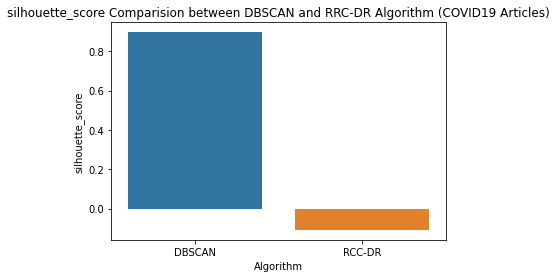

In [ ]:
plot_results=[['DBSCAN',dbscan_value_SV,total_time_dbscan],
              ['RCC-DR',rcc_SV,total_time_rcc]]

plot_results_df=pd.DataFrame(plot_results,columns=['Algorithm','silhouette_score','time'])
print(plot_results_df)

sns.barplot(x='Algorithm',y='silhouette_score',data=plot_results_df)
plt.title('silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (COVID19 Articles)')



Text(0, 0.5, 'time (sec)')

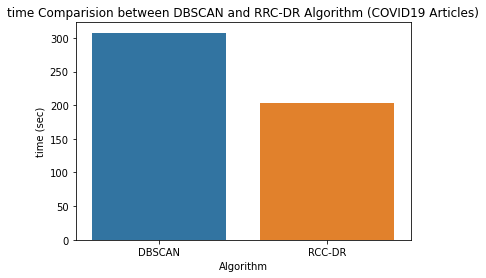

In [ ]:
sns.barplot(x='Algorithm',y='time',data=plot_results_df)
plt.title('time Comparision between DBSCAN and RRC-DR Algorithm (COVID19 Articles)')
plt.ylabel('time (sec)')

Dataset 3 @ Reddit Comments Analysis , Dataset Domain @ Social Media

In [ ]:
!kaggle datasets download -d ehallmar/reddit-comment-score-prediction

reddit-comment-score-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/reddit-comment-score-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
dataset_reddit=pd.read_csv('/content/comments_positive.csv',nrows=100000)

In [ ]:
dataset_reddit

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c6n1ojx,t1_c6n1896,t5_2qh0u,t3_11isxb,It's a legitimate tactic.,600,600,zackks,0,t3_11isxb,Fucking campers...,861,861,Genmaken,0
99996,c68uuui,t1_c68udww,t5_2qh1e,t3_zya03,"&gt; Unless one says something specific like ""...",600,600,[deleted],0,t3_zya03,Restaurants have a right to refuse service to ...,258,258,ExoticKosher,0
99997,cnlv43q,t1_cnluk63,t5_2qh13,t3_2s3km3,I am on the same thought wave that you are.\n\...,600,600,jprjansen,0,t3_2s3km3,I've had a couple people try to explain to me ...,2453,2453,relevantlife,0
99998,c65seyj,t1_c65s7fv,t5_2qh1i,t3_zm0ac,we didn't give them a chance to mwahahahahaha,600,600,MrSnare,0,t3_zm0ac,The potatoes didn't starve,742,742,JS4077,0


In [ ]:
dataset_reddit=dataset_reddit[['parent_text']]

In [ ]:
dataset_reddit

,parent_text
0,Fucking faggot.
1,"Elaborate on this cum box, please."
2,"I don't live in Russia anymore, and I will not..."
3,This just made me realize that future presiden...
4,I have sex with my step mom when my dad isn't ...
...,...
99995,Fucking campers...
99996,Restaurants have a right to refuse service to ...
99997,I've had a couple people try to explain to me ...
99998,The potatoes didn't starve


In [ ]:
dataset_reddit['parent_text']=dataset_reddit['parent_text'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_reddit['parent_text_cleaned']=dataset_reddit['parent_text'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_reddit

,parent_text,parent_text_cleaned
0,Fucking faggot.,fuck faggot
1,"Elaborate on this cum box, please.",elabor cum box pleas
2,"I don't live in Russia anymore, and I will not...",dont live russia anymor go back time soon also...
3,This just made me realize that future presiden...,made realiz futur presid probabl facebook twit...
4,I have sex with my step mom when my dad isn't ...,sex step mom dad isnt around im junior high sc...
...,...,...
99995,Fucking campers...,fuck camper
99996,Restaurants have a right to refuse service to ...,restaur right refus servic anyon unless one sa...
99997,I've had a couple people try to explain to me ...,ive coupl peopl tri explain bad ga price go ri...
99998,The potatoes didn't starve,potato didnt starv


In [ ]:
import time
start = time.time()
silhouette_value =[]

i,j=0,100
for k in range(dataset_reddit.shape[0]):
  if i<dataset_reddit.shape[0]:
     current_batch_log=dataset_reddit['parent_text_cleaned'][i:j]
     value=streamming_rcc(current_batch_log,vectorizer)
     silhouette_value.append(value)
     j=j+100
     i=i+100

end=time.time()
total_time_rcc=end-start
print('Total time is',total_time_rcc)

Streaming output truncated to the last 5000 lines.
  0  0  1  0  1  1  0  1  1  1  0  0  0  1  1  0  1  1  0  0  1  0  0  1
  0  0  0  0  2  3  1  4  0  0  0  0  0  5  6  7  8  9 10 11 12 13 14 15
 16 17 18  1  0 19  1  0 20 21  0  0  0  1  1  0  1  1  0  1  1  0  0  0
  1  0  0  1]
mu = 0.91323151771239, lambda = 0.269916826543236, epsilon = 0.03863374516367912, delta = 0.03863374516367912
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.09941962032350138 | 0.09941962032350138
 2 | 0.011879655967589416 | 0.06336309942523918 | 0.0752427553928286
 3 | 0.012056652970022237 | 0.05430432319433312 | 0.06636097616435535
 4 | 0.010637690340546416 | 0.044086449566471904 | 0.05472413990701832
 5 | 0.008930281078937535 | 0.034097862923676274 | 0.04302814400261381
 6 | 0.006262160399914669 | 0.02543931589106201 | 0.03170147629097668
[ 0  1  1  2  1  1  0  1  1  1  3  1  1  3  1  1  1  1  1  1  1  1  1  3
  1  4  1  1  3  1  1  5  1  3  3  1  1  1  1  1  1  1  3  2  3  6  1  1
  1  7  7  7  8  7  7 

In [ ]:
silhouette_value=np.array(silhouette_value) 

In [ ]:
rcc_SV=silhouette_value.mean()

In [ ]:
rcc_SV

-0.3076312364764341

In [ ]:
total_time_rcc

144.8112907409668

In [ ]:
i,j=0,100
import time
start = time.time()
silhouette_value =[]

for k in range(dataset_reddit.shape[0]):
  if i<dataset_reddit.shape[0]:
     current_batch_log=dataset_reddit['parent_text_cleaned'][i:j]
     score_value=streamming_dbscan(current_batch_log,vectorizer)
     silhouette_value.append(score_value)
     j=j+100
     i=i+100

end = time.time()
total_time_dbscan=end-start
print('Total time',total_time_dbscan)

[1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 6, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8
[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 3, 1, 1, 1, 1, 1, 9, 2, 10, 1, 3, 11, 1, 1, 1, 1, 1, 1, 1, 7, 3, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 3, 1, 1]
13
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 6, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 1, 9, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 10, 2, 11, 1, 1, 1, 12, 1, 1, 1, 13, 1, 1, 2, 14, 1, 1, 1, 15, 1, 1, 1, 1, 1, 16, 1, 9, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1]
17
[1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 5, 1, 4, 1, 

In [ ]:
total_time_dbscan

226.0624179840088

In [ ]:
silhouette_value=np.array(silhouette_value)

In [ ]:
dbscan_value_SV=silhouette_value.mean() 

In [ ]:
dbscan_value_SV

0.9120269267493273

  Algorithm  silhouette_score        time
0    DBSCAN          0.912027  226.062418
1    RCC-DR         -0.307631  144.811291


Text(0.5, 1.0, 'silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Reddit Comments) ')

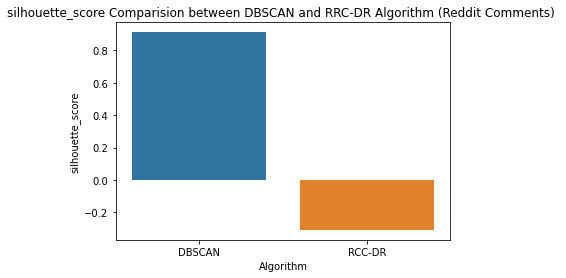

In [ ]:
plot_results=[['DBSCAN',dbscan_value_SV,total_time_dbscan],
              ['RCC-DR',rcc_SV,total_time_rcc]]

plot_results_df=pd.DataFrame(plot_results,columns=['Algorithm','silhouette_score','time'])
print(plot_results_df)

sns.barplot(x='Algorithm',y='silhouette_score',data=plot_results_df)
plt.title('silhouette_score Comparision between DBSCAN and RRC-DR Algorithm (Reddit Comments) ')



Text(0, 0.5, 'time (sec)')

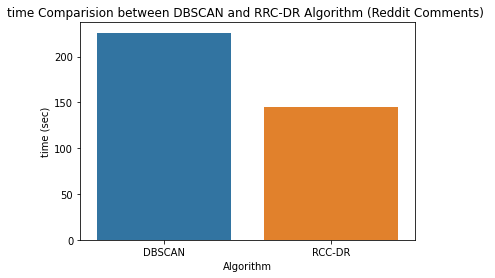

In [ ]:
sns.barplot(x='Algorithm',y='time',data=plot_results_df)
plt.title('time Comparision between DBSCAN and RRC-DR Algorithm (Reddit Comments) ')
plt.ylabel('time (sec)')